In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

northwestern_df = pd.read_excel('./northwestern_data.xlsx')
northwestern_df.head()


,Case ID#,Filed:,Status:,Court:,Gender:,Race:,Ethnicity:,Crime Type:,Count:,Charge Code:,...,Prosecutor Facility:,Prosecutor Sentence Type:,Prosecutor Term Min:,Prosecutor Term Min Unit:,Prosecutor Term Max:,Prosecutor Term Max Unit:,Fine:,Probation:,Probation Term:,Probation Term Unit:
0,\n19-10-160319,2019-10-15 00:00:00,Closed,Northampton District Court,Male,White,Hispanic/Latinx,Assaults,1,265/15B/A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,\n19-10-160319,2019-10-15 00:00:00,Closed,Northampton District Court,Male,White,Hispanic/Latinx,Assaults,2,265/13A/B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Probation,2.0,Years
2,0,2008-05-07 00:00:00,Closed,Greenfield District Court,Female,White,NaN,Assaults,1,265/13A/B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276/87,1.0,Years
3,0,2008-05-07 00:00:00,Closed,Greenfield District Court,Female,White,NaN,Assaults,2,268/32B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00-03-111111,2001-10-17 14:32:14,Closed,DC,Male,NaN,NaN,OUI,1,OP UNDR INFL LIQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df = northwestern_df[['Count:', "Charge Description:" ,"Crime Type:", "Race:", "Gender:", "Disposition:", "Sentence Type:"]]
df2 = df[['Race:', 'Gender:','Crime Type:', 'Disposition:', 'Sentence Type:']]
corr = df2.corr()
corr
corr.style.background_gradient(cmap='coolwarm')


/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_23325/2227265453.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_23325/1592795400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sentence Type:"] = df["Sentence Type:"].replace(["Plead Guilty", "Guilty verdict" ], "Guilty")
/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_23325/1592795400.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Race:'] = df['Race:'].replace(['Multi-Racial',"Middle Eastern","East Indian","Arabic","Cambodian","Native Hawaiian or Other Pacific Islander" ,'American 

White       305362
Black        28990
Hispanic     12425
Other         4715
Asian         3850
Name: Race:, dtype: int64


<AxesSubplot: xlabel='Race:'>

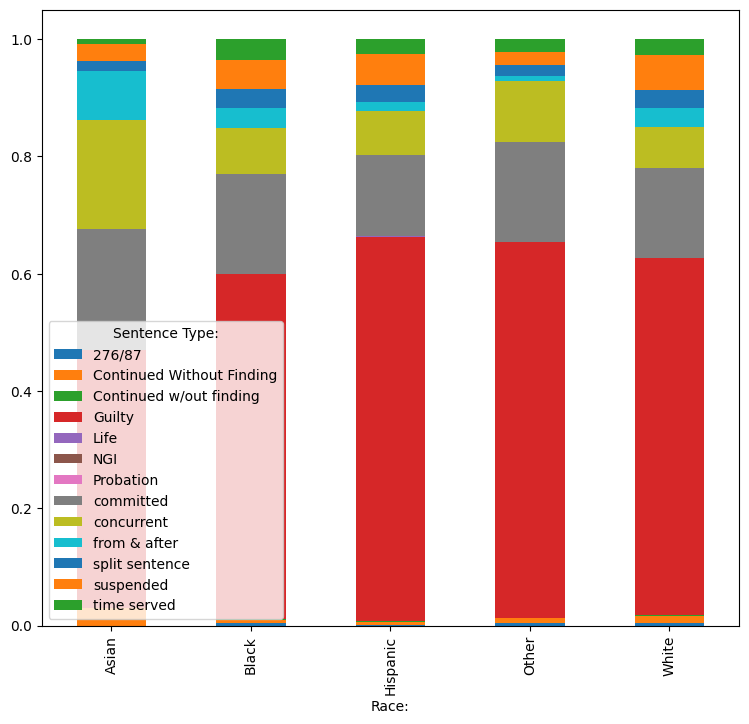

In [28]:
df["Sentence Type:"] = df["Sentence Type:"].replace(["Plead Guilty", "Guilty verdict" ], "Guilty")

df['Race:'] = df['Race:'].replace(['Multi-Racial',"Middle Eastern","East Indian","Arabic","Cambodian","Native Hawaiian or Other Pacific Islander" ,'American Indian or Alaskan Native', 'Egyptian',"PR","AfrAm", 'Unknown'], 'Other')
df['Race:'] = df['Race:'].replace(["Mexican"],'Hispanic')
df['Race:'] = df['Race:'].replace(['Caucasion', 'Russian'], 'White')
grouped= df.groupby(['Race:','Sentence Type:']).size().unstack()
print(df["Race:"].value_counts())

grouped = grouped.div(grouped.sum(axis=1), axis=0)
grouped.plot(kind = "bar", stacked = True, figsize=(9, 8))



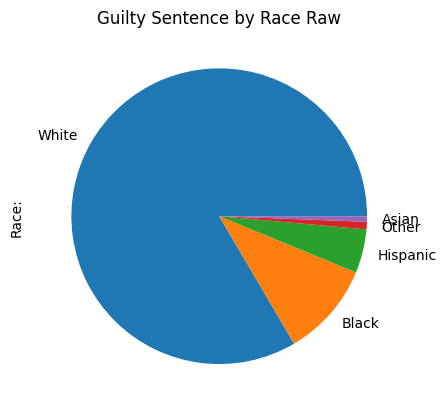

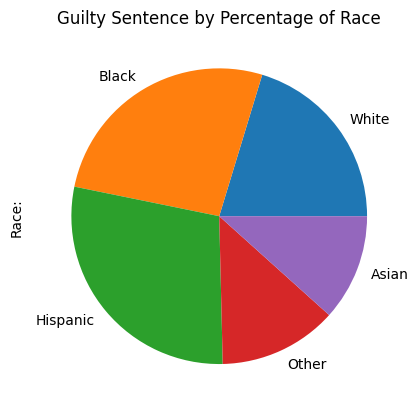

In [29]:
df['Race:'].value_counts()
new_df = df.loc[df['Sentence Type:'] == 'Guilty']

new_df.head()
new_df['Race:'].value_counts()

(new_df['Race:'].value_counts()).plot.pie(y='Race:', title="Guilty Sentence by Race Raw") 
plt.show()
(new_df['Race:'].value_counts()/df['Race:'].value_counts()).plot.pie(y='Race', title="Guilty Sentence by Percentage of Race")
plt.show()